## classification

- perceptron 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
df=pd.DataFrame({'sleep_proportion':[0.2, 0.4, 0.5, 0.7],
                'grumpy_proportion':[0.1,0.6,0.2,0.9],
                'prediction':['kitten','kitten','kitten','adult']})
df.head()

,sleep_proportion,grumpy_proportion,prediction
0,0.2,0.1,kitten
1,0.4,0.6,kitten
2,0.5,0.2,kitten
3,0.7,0.9,adult


In [2]:
kitten=df[df['prediction']=='kitten']
kitten

,sleep_proportion,grumpy_proportion,prediction
0,0.2,0.1,kitten
1,0.4,0.6,kitten
2,0.5,0.2,kitten


In [3]:
adult=df[df['prediction']=='adult']
adult

,sleep_proportion,grumpy_proportion,prediction
3,0.7,0.9,adult


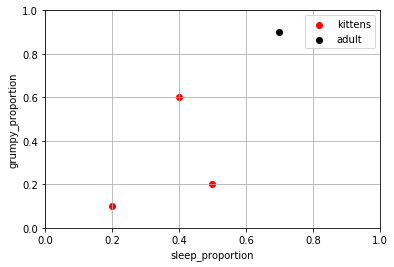

In [4]:
plt.scatter(kitten['sleep_proportion'],kitten['grumpy_proportion'],label='kittens',color='r')
plt.scatter(adult['sleep_proportion'],adult['grumpy_proportion'],label='adult',color='k')
plt.xlabel('sleep_proportion')
plt.ylabel('grumpy_proportion')
plt.legend()
plt.axis([0,1,0,1])
plt.grid()

In [5]:
df['bprediction']=df['prediction']=='kitten'
#df['bprediction']=df['prediction'].apply(lambda x: x=='kitten')
from sklearn.linear_model import Perceptron
classifier =Perceptron(max_iter=1000)
model=classifier.fit(df[['sleep_proportion','grumpy_proportion']], df['bprediction'])
df

,sleep_proportion,grumpy_proportion,prediction,bprediction
0,0.2,0.1,kitten,True
1,0.4,0.6,kitten,True
2,0.5,0.2,kitten,True
3,0.7,0.9,adult,False


In [6]:
print(model.predict([[0.2, 0.1]]))
print(model.predict([[0.9, 0.9]]))
print(model.predict([[0.5, 0.5],[0.9,0.9]]))

[ True]
[False]
[ True False]


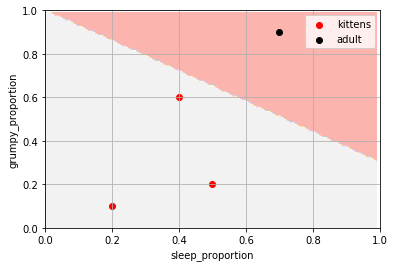

In [7]:
import numpy as np
x_min,x_max=0,1
y_min,y_max=0,1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),
                 np.arange(y_min,y_max,0.01))
#print(xx)
#print(yy)
xx_lin=xx.ravel()
#print(xx_lin)
yy_lin=yy.ravel()
#print(yy_lin)
pred_input=np.c_[xx_lin,yy_lin]
#print(pred_input)
z=model.predict(pred_input)
#print(z)
z=z.reshape(xx.shape)
#print(z)
#contourf fills the area. it requires 2 dim array
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(kitten['sleep_proportion'],kitten['grumpy_proportion'],label='kittens',color='r')
plt.scatter(adult['sleep_proportion'],adult['grumpy_proportion'],label='adult',color='k')
plt.xlabel('sleep_proportion')
plt.ylabel('grumpy_proportion')
plt.legend()
plt.axis([0,1,0,1])
plt.grid()

In [8]:
print(model.coef_)#weightage of model value of m and c in eqn of line

[[-0.7 -1. ]]


In [9]:
print(model.intercept_) 

[1.]


## SVM Support Vector Machine

In [10]:
from sklearn.svm import SVC
SVCClassifier=SVC(kernel='linear',C=10,max_iter=5)
SVCModel=SVCClassifier.fit(df[['sleep_proportion','grumpy_proportion']], df['bprediction'])

In [30]:
print(SVCModel.predict([[0.2, 0.1]]))
print(SVCModel.predict([[0.9, 0.9]]))
print(SVCModel.predict([[0.5, 0.5],[0.9,0.9]]))
actual=df['bprediction']
from sklearn.metrics import confusion_matrix
pred=SVCModel.predict(df[['sleep_proportion','grumpy_proportion']])
print(actual)
print(pred)
print(confusion_matrix(actual,pred))
print(classification_report(actual,pred,target_names=['class adult','class kitten']))
print(classification_report(actual,pred))

[ True]
[False]
[ True False]
0     True
1     True
2     True
3    False
Name: bprediction, dtype: bool
[ True  True  True False]
[[1 0]
 [0 3]]
              precision    recall  f1-score   support

 class adult       1.00      1.00      1.00         1
class kitten       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         1
        True       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



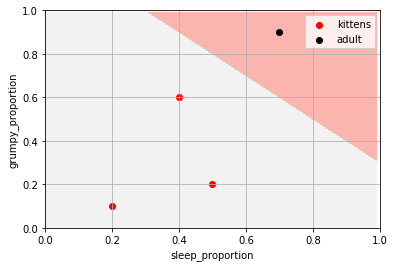

In [12]:
z=SVCModel.predict(pred_input)
#print(z)
z=z.reshape(xx.shape)
#print(z)
#contourf fills the area. it requires 2 dim array
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(kitten['sleep_proportion'],kitten['grumpy_proportion'],label='kittens',color='r')
plt.scatter(adult['sleep_proportion'],adult['grumpy_proportion'],label='adult',color='k')
plt.xlabel('sleep_proportion')
plt.ylabel('grumpy_proportion')
plt.legend()
plt.axis([0,1,0,1])
plt.grid()

In [13]:
print(SVCModel.coef_)

[[-3. -3.]]


In [14]:
print(SVCModel.intercept_)

[3.89999986]


In [16]:
print(SVCModel.support_vectors_)

[[0.7 0.9]
 [0.4 0.6]]


### Confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np
actual= np.array([True,True,False,True])
pred=np.array([True,True,False,False])
print(confusion_matrix(actual,pred))

[[1 0]
 [1 2]]


In [20]:
actual= np.array(['dog','cat','dog','dog','cat'])
pred=np.array(['dog','dog','dog','cat','cat'])
print(confusion_matrix(actual,pred,labels=['cat','dog']))

[[1 1]
 [1 2]]


In [21]:
actual= np.array([0,0,1,1,1,1,1,2,2,2,2,2,2,2,0,1])
pred=np.array([0,1,1,2,1,2,1,2,2,2,2,1,1,1,0,1])
print(confusion_matrix(actual,pred,labels=[0,1,2]))

[[2 1 0]
 [0 4 2]
 [0 3 4]]


### classification report

In [26]:
from sklearn.metrics import classification_report
import numpy as np
actual= np.array([True,True,False,True])
pred=np.array([True,True,False,False])
print(confusion_matrix(actual,pred))

print(classification_report(actual,pred)) #DEFAULT FALSE,TRUE
print(classification_report(actual,pred,target_names=['class false','class true']))

[[1 0]
 [1 2]]
              precision    recall  f1-score   support

       False       0.50      1.00      0.67         1
        True       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

              precision    recall  f1-score   support

 class false       0.50      1.00      0.67         1
  class true       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



- precision=(TP/TP+FP)  eg(2/2+0)  (TN/TN+FN)  eg(1/1+1)
- RECALL=TP/TP+FN   2/2+1    TN/TN+FP  1/1+0
- ACCURACY=SUM OF DIAGONAL MATRIX/SUM OF THE WHOLE MATRIX VALUES
- F1-SCORE=2*((PRECISION*RECALL)/(PRECISION+RECALL))   2*((0.5*1)/(0.5+1))
- MACRO AVG=(PRECISION(FALSE)+PRECISION*(TRUE))/2 
- (0.5+1)/2
- WEIGHTED (AVG=PRECISION(FALSE)*SUPPORT(FALSE)+PRECISION(TRUE)*SUPPORT(TRUE))/SUM OF SUPPORT